In [11]:
import csv
import torch
import numpy as np
import pandas as pd
import copy
import networkx as nx
import random
import matplotlib.pyplot as plt


In [35]:
# Load the CSV file into a DataFrame
data = pd.read_csv("train.csv")

# Display the first five rows of the DataFrame
print(data.shape)
data.head()

(1458644, 11)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [2]:
# show distributaion of the data
print(data.min(axis=0))
print(data.max(axis=0))

id                              id0000001
vendor_id                               1
pickup_datetime       2016-01-01 00:00:17
dropoff_datetime      2016-01-01 00:03:31
passenger_count                         0
pickup_longitude              -121.933342
pickup_latitude                 34.359695
dropoff_longitude             -121.933304
dropoff_latitude                32.181141
store_and_fwd_flag                      N
trip_duration                           1
dtype: object
id                              id4000000
vendor_id                               2
pickup_datetime       2016-06-30 23:59:39
dropoff_datetime      2016-07-01 23:02:03
passenger_count                         9
pickup_longitude               -61.335529
pickup_latitude                 51.881084
dropoff_longitude              -61.335529
dropoff_latitude                43.921028
store_and_fwd_flag                      Y
trip_duration                     3526282
dtype: object


In [32]:
data2=copy.deepcopy(data)
data2['pickup_longitude'] = data['pickup_longitude'].round(2)
data2['pickup_latitude'] = data['pickup_latitude'].round(2)
data2['dropoff_longitude'] = data['dropoff_longitude'].round(2)
data2['dropoff_latitude'] = data['dropoff_latitude'].round(2)

data2.head()


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1695,id1261506,2,2016-01-04 08:45:43,2016-01-04 08:57:27,2,-73.99,40.74,-73.97,40.76,N,704
3560,id3277602,1,2016-01-04 08:02:30,2016-01-04 08:11:54,2,-73.97,40.76,-74.00,40.74,N,564
14435,id2988116,2,2016-01-04 08:44:18,2016-01-04 09:02:44,4,-73.95,40.78,-73.98,40.76,N,1106
14852,id3771820,2,2016-01-04 08:46:00,2016-01-04 08:55:04,1,-73.94,40.75,-73.95,40.74,N,544
20689,id0344937,2,2016-01-04 08:44:24,2016-01-04 09:06:09,5,-74.00,40.68,-73.99,40.74,N,1305


In [17]:
# Create a directed graph
G2 = nx.DiGraph()
selfloops = 0
# Add edges to the graph
for row in data2.itertuples():
    source = (row.pickup_longitude, row.pickup_latitude)
    destination = (row.dropoff_longitude, row.dropoff_latitude)
    weight = row.trip_duration
    if (source != destination):
      G2.add_edge(source, destination, weight=weight)
    else :
      selfloops+=1

print(f'num of self loops in data2 = {selfloops}')

num of self loops in data2 = 72307


In [36]:
# Round the coordinates to 3 decimal places
data['pickup_longitude'] = data['pickup_longitude'].round(3)
data['pickup_latitude'] = data['pickup_latitude'].round(3)
data['dropoff_longitude'] = data['dropoff_longitude'].round(3)
data['dropoff_latitude'] = data['dropoff_latitude'].round(3)

In [21]:
G3 = nx.DiGraph()

selfloops = 0
# Add edges to the graph
for row in data.itertuples():
    source = (row.pickup_longitude, row.pickup_latitude)
    destination = (row.dropoff_longitude, row.dropoff_latitude)
    weight = row.trip_duration
    if (source != destination):
      G3.add_edge(source, destination, weight=weight)
    else :
      selfloops+=1


print(f'num of self loops in data3 = {selfloops}')

num of self loops in data3 = 10764


In [26]:
min_weight = min(nx.get_edge_attributes(G3, 'weight').values())
max_weight = max(nx.get_edge_attributes(G3, 'weight').values())

print(f"Minimum weight: {min_weight}")
print(f"Maximum weight: {max_weight}")

Minimum weight: 1
Maximum weight: 3526282


<ipython-input-25-0514f177c31e>:1: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  subgraph = G3.subgraph(random.sample(G3.nodes(), 300))


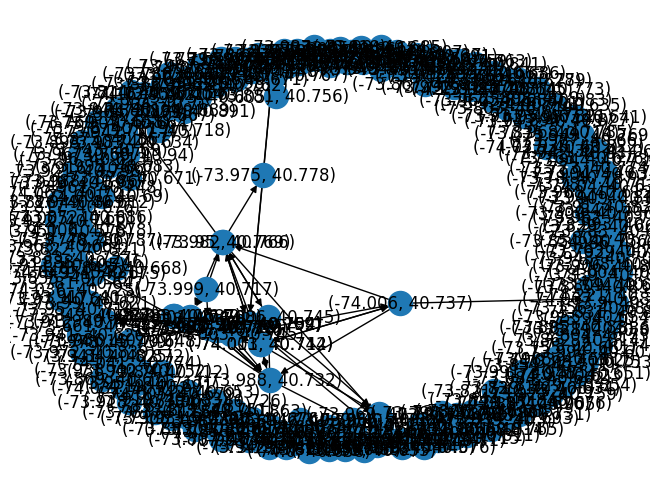

In [ ]:
subgraph = G3.subgraph(random.sample(G3.nodes(), 300))

# Plot the subgraph
nx.draw(subgraph, with_labels=True)
plt.show()


In [37]:

# Convert the pickup and dropoff timestamps to datetime objects
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])

In [38]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982,40.768,-73.965,40.766,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980,40.739,-73.999,40.731,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979,40.764,-74.005,40.710,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010,40.720,-74.012,40.707,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973,40.793,-73.973,40.783,N,435


In [44]:
dataOneHour=copy.deepcopy(data)
dataOneHour = dataOneHour[(dataOneHour['pickup_datetime'] >= '2016-01-04 08:00:00') & (dataOneHour['pickup_datetime'] <= '2016-01-04 09:00:00')]

In [45]:
dataOneHour.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1695,id1261506,2,2016-01-04 08:45:43,2016-01-04 08:57:27,2,-73.987,40.737,-73.972,40.760,N,704
3560,id3277602,1,2016-01-04 08:02:30,2016-01-04 08:11:54,2,-73.971,40.762,-73.996,40.736,N,564
14435,id2988116,2,2016-01-04 08:44:18,2016-01-04 09:02:44,4,-73.952,40.778,-73.981,40.764,N,1106
14852,id3771820,2,2016-01-04 08:46:00,2016-01-04 08:55:04,1,-73.938,40.750,-73.954,40.745,N,544
20689,id0344937,2,2016-01-04 08:44:24,2016-01-04 09:06:09,5,-74.000,40.684,-73.989,40.737,N,1305


In [46]:
G = nx.DiGraph()

selfloops = 0
# Add edges to the graph
for row in dataOneHour.itertuples():
    source = (row.pickup_longitude, row.pickup_latitude)
    destination = (row.dropoff_longitude, row.dropoff_latitude)
    weight = row.trip_duration
    if (source != destination):
      G.add_edge(source, destination, weight=weight)
    else :
      selfloops+=1

print(f'num of self loops in one hour = {selfloops}')

num of self loops in one hour = 4


In [51]:
G_with_selfloops = nx.DiGraph()

# Add edges to the graph
for row in dataOneHour.itertuples():
    source = (row.id, row.pickup_longitude, row.pickup_latitude)
    destination = (row.id, row.dropoff_longitude, row.dropoff_latitude)
    weight = row.trip_duration #FIXME change to speed   
    G_with_selfloops.add_edge(source, destination, weight=weight)
    G_with_selfloops.add_node


In [53]:

# Initialize empty lists for the new features
traffic_from = []
traffic_into = []
traffic_from_avg = []
traffic_into_avg = []

indexes = dataOneHour.index

# Loop through each data point
for i in indexes:
    # pickup_node = (dataOneHour['pickup_longitude'][i], dataOneHour['pickup_latitude'][i])
    # dropoff_node = (dataOneHour['dropoff_longitude'][i], dataOneHour['dropoff_latitude'][i])
    node = (dataOneHour['id'][i], dataOneHour['pickup_longitude'][i], dataOneHour['pickup_latitude'][i])

    incoming_edges = list(G_with_selfloops.in_edges("B"))

    # Calculate the average weight of edges leaving the pickup node
    out_weights = [G_with_selfloops.get_edge_data(node, neighbor)['weight'] for neighbor in G_with_selfloops.neighbors(node)]
    # print(out_avg_weight)
    out_avg_weight = sum(out_weights) / len(out_weights) if len(out_weights) > 0 else 0

    incoming_edges = list(G_with_selfloops.in_edges(node))
    # Calculate the average weight of edges entering the dropoff node
    in_weights =[]
    for edge in incoming_edges:
        w = int(G_with_selfloops.get_edge_data(edge[0], edge[1])['weight'])
        if w :
            in_weights.append(w)

    # in_weights = [G.get_edge_data(edge[0], edge[1])['weight'] for edge in incoming_edges]
    # print(f'in_w = {in_weights}')
    in_avg_weight = sum(in_weights) / len(in_weights) if len(in_weights) > 0 else 0

    # Append the calculated values to the lists
    # traffic_from.append(out_degree)
    # traffic_into.append(in_degree)
    traffic_from_avg.append(out_avg_weight)
    traffic_into_avg.append(in_avg_weight)

# Add the new features to the DataFrame
# dataOneHour['traffic_from'] = traffic_from
# dataOneHour['traffic_into'] = traffic_into
dataOneHour['traffic_from_avg'] = traffic_from_avg
dataOneHour['traffic_into_avg'] = traffic_into_avg

# Print the DataFrame with the new features
dataOneHour.head()


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,traffic_from_avg,traffic_into_avg
1695,id1261506,2,2016-01-04 08:45:43,2016-01-04 08:57:27,2,-73.987,40.737,-73.972,40.760,N,704,704.0,0.0
3560,id3277602,1,2016-01-04 08:02:30,2016-01-04 08:11:54,2,-73.971,40.762,-73.996,40.736,N,564,564.0,0.0
14435,id2988116,2,2016-01-04 08:44:18,2016-01-04 09:02:44,4,-73.952,40.778,-73.981,40.764,N,1106,1106.0,0.0
14852,id3771820,2,2016-01-04 08:46:00,2016-01-04 08:55:04,1,-73.938,40.750,-73.954,40.745,N,544,544.0,0.0
20689,id0344937,2,2016-01-04 08:44:24,2016-01-04 09:06:09,5,-74.000,40.684,-73.989,40.737,N,1305,1305.0,0.0


In [54]:
print(sum(dataOneHour['traffic_into_avg']))

1010.0
